Bài thực hành 3

1. Hồi quy Logistic

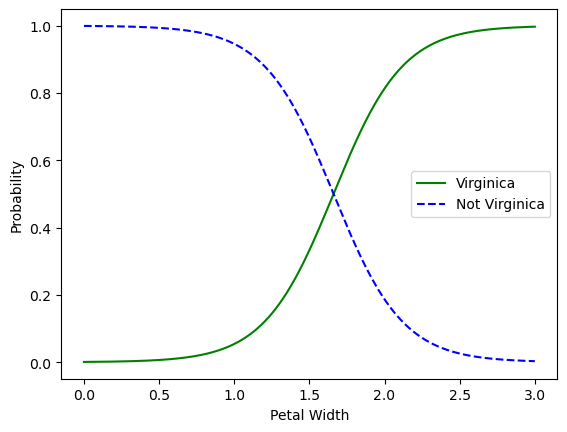

In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load dữ liệu Iris
iris = load_iris()

# Lấy thuộc tính Petal Width
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

# Tạo mô hình hồi quy logistic
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán trên dữ liệu mới
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

# Vẽ đồ thị
plt.plot(X_new, y_proba[:, 1], "g-", label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Virginica")
plt.xlabel("Petal Width")
plt.ylabel("Probability")
plt.legend()
plt.show()

Mục 3: bài 5

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:

def compute_loss(y_true, y_hat):
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

In [6]:
def compute_gradient(X, y_true, y_hat):
    return np.dot(X.T, y_hat - y_true) / len(y_true)

In [7]:
def initialize_parameters(n_features):
    return np.zeros(n_features)

In [22]:
def fit(X, y_true, alpha=0.1, num_iters=100):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    w = initialize_parameters(X.shape[1])
    m = len(y_true)

    for _ in range(num_iters):
        z = np.dot(X, w)
        y_hat = sigmoid(z)
        gradient = compute_gradient(X, y_true, y_hat)
        w -= alpha * gradient

    return w


In [43]:
def predict(X_new, w):
    intercept = np.ones((X_new.shape[0], 1))
    X_new = np.concatenate((intercept, X_new), axis=1)
    
    y_hat_new = sigmoid(np.dot(X_new, w))
    y_pred_new = np.where(y_hat_new >= 0.5, 1, 0)
    
    return y_pred_new


w = fit(X, y, alpha=0.1, num_iters=1000)
y_pred = np.round(sigmoid(np.dot(X, w)))
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

#Đến đây em bí rồi ạ, em chả biết bị lỗi gì nữa luôn...

AttributeError: 'int' object has no attribute 'shape'

Bài thực hành 4

Mục 4

In [47]:
import pandas as pd
data = pd.read_csv("housing.csv")

<Axes: xlabel='median_house_value', ylabel='Count'>

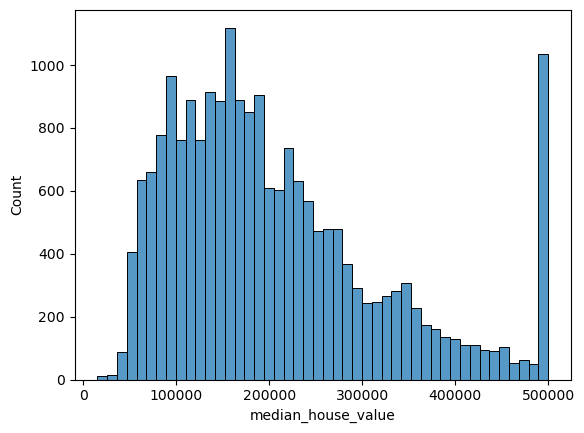

In [49]:
data.describe()
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'])

In [50]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

C:\Users\nminh\AppData\Local\Temp\ipykernel_37336\1146386502.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method='pearson')


<Axes: >

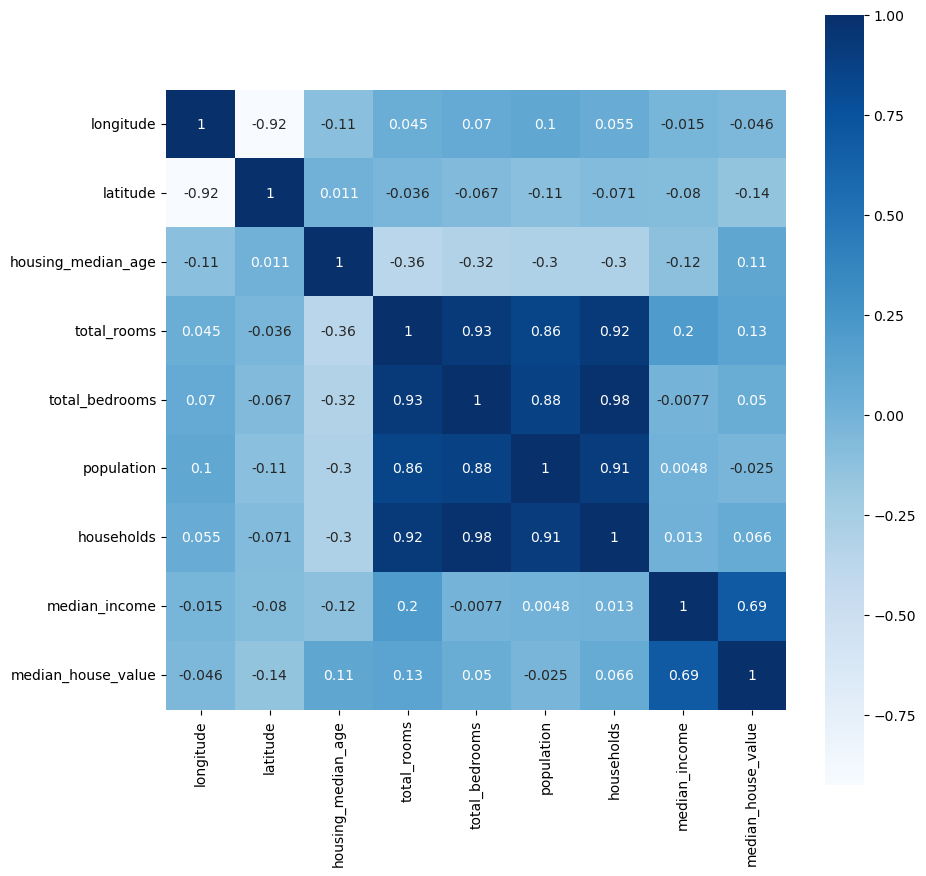

In [51]:
import seaborn as sns
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

<Axes: xlabel='median_income', ylabel='median_house_value'>

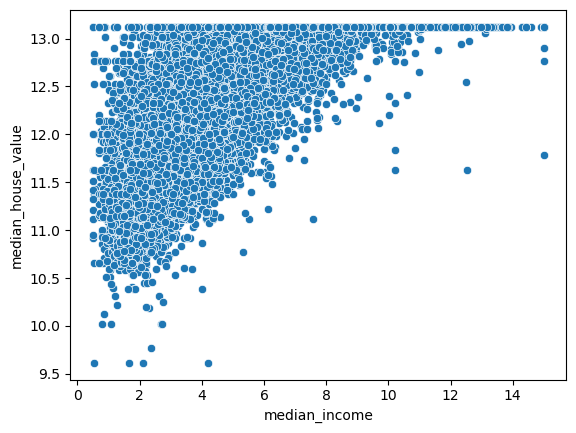

In [71]:
import seaborn as sns
import pandas as pd
X_train = data['median_income']
y_train = data['median_house_value']
y_train_transformed = np.log(y_train)
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

In [78]:
# Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sc = MinMaxScaler(feature_range=(1, 55))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_transformed = sc.fit_transform(y_train.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.reshape(-1,1)).reshape(-1)



In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)

LinearRegression()

In [87]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test_transformed, y_pred, squared=True)
print("Root Mean Squared Error:", mse)

test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred.reshape(-1)}) # reshape y_pred to match the shape of X_test and y_test_transformed
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


Root Mean Squared Error: 27.055956123415115


ValueError: All arrays must be of the same length

In [85]:
print(len(X_test))
print(len(y_test_transformed))
print(len(y_pred))


30
30
30


In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
X_train = X.values[train_index].reshape(-1,1)
y_train = y_transformed[train_index]
X_test = X.values[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result = mean_squared_error(y_test, y_pred, squared=True)
# Lưu lại kết quả từng fold vào avg_mse 
avg_mse.append(result)


IndentationError: expected an indented block after 'for' statement on line 6 (2344373752.py, line 7)